In [ ]:
# Tensorlfow and tf.keras
import tensorflow as tf 
from tensorflow import  keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#Import MNIST dataset
mnist = tf.keras.datasets.mnist
(train_dataset, train_label), (test_dataset, test_label) = mnist.load_data()

# Label
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

2.2.0


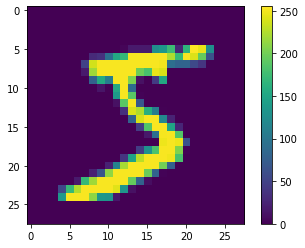

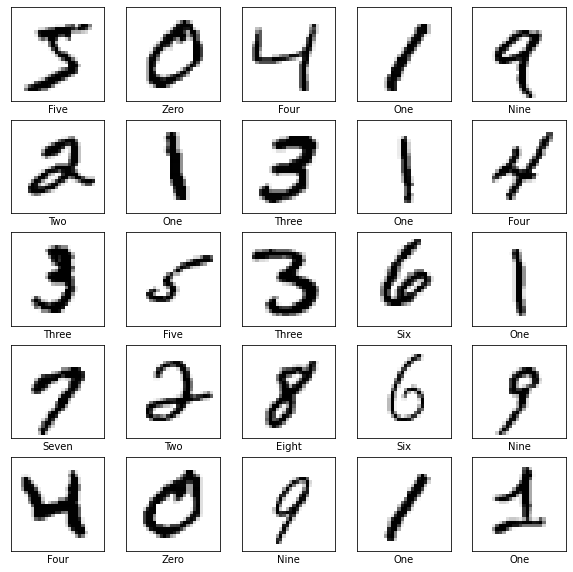

In [ ]:
#Preprocess the data
plt.figure()
plt.imshow(train_dataset[0])
plt.colorbar()
plt.grid(False)
plt.show()



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_dataset[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [ ]:
train_dataset =  train_dataset/255.0
test_dataset =  test_dataset/255.0

# Create model network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])
# Loss function and optimization 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Training model
model.fit(train_dataset, train_label, epochs=20)

# Test model
test_loss, test_acc = model.evaluate(test_dataset,  test_label, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.9145
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1484 - accuracy: 0.9554
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1110 - accuracy: 0.9665
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0896 - accuracy: 0.9722
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9810
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0545 - accuracy: 0.9818
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9838
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.045

In [ ]:
# Make predictions
predictions = model.predict(test_dataset)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

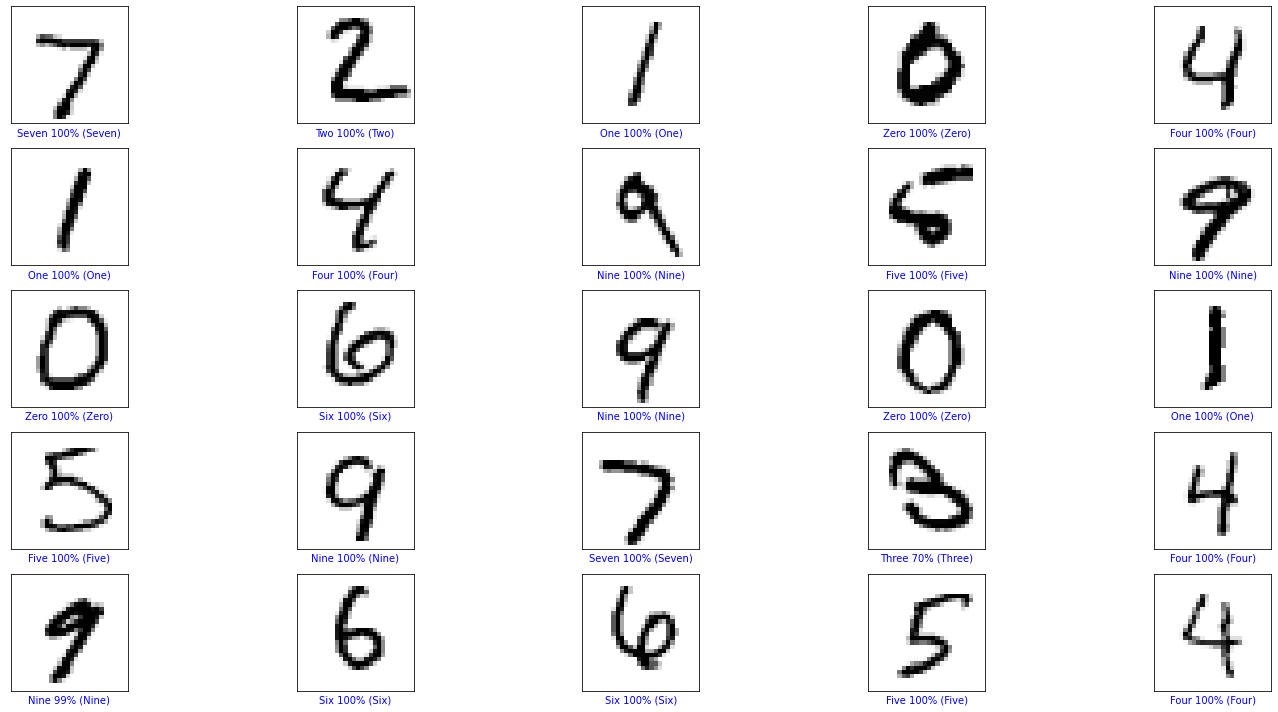

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_dataset)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()